In [4]:
from IPython.core.display import display, HTML

C:\Users\katie\AppData\Local\Temp\ipykernel_1760\2058709175.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---
#### Abstract:
This notebook is about helping the management of a Ukrainian advertising company that has lived through a brutal war to start their new business and life by choosing an appropriate new country between Australia and the United Kingdom.

It contains data analysis, insights, and strategic decisions on Australia and UK news headlines on the Ukraine war. The sequence is to interpret the entire dataset and answer five questions related to stakeholders through the three primary use techniques and some of the simple detailed analysis techniques, which are TF/IDF, LDA, and sentiment analysis with textblob and some simple detailed analysis techniques, and finally, make strategic decisions based on insights into the data and stakeholder needs.

#### Question: 
Using *The Guardian* API, compare Australian and United Kingdom headlines about the war in Ukraine. What can we learn about differences and similarities between the news presented to Australia and the UK?

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [5]:
#Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install gensim
#!{sys.executable} -m pip install pyLDAvis
#!{sys.executable} -m pip install wordcloud
#!{sys.executable} -m pip install textblob
#!{sys.executable} -m pip install squarify

In [6]:
# import libraries
import pandas as pd 
import numpy as np
import re
import json
import requests
import matplotlib.pyplot as plt
import squarify 
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.utils import tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
#from gensim.summarization import keywords
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'pandas'

### 1.1 Question

> **CONCERN:** A Ukrainian advertising company wants to compare Australian and the United Kingdom headlines and the coverage content shown by the news headlines about the war in Ukraine to gauge the attitudes and and several other factors of the Australian and the United Kingdom media about the war in Ukraine and hoped to use this as a criterion to determine which country they will go to and start for new business.


- **Q1: What do news headlines in Australia and the United Kingdom say about the war in Ukraine？**

**Description**：This question focuses on the critical messages converted from the headlines in both countries about the war in Ukraine. This Ukrainian advertising company is very concerned about the two countries' attitudes towards the war itself and what do they think about the war in Ukraine.

- **Q2: How do news headlines in Australia and the United Kingdom interpret the war in Ukraine？**

**Description**：The Ukrainian advertising company wanted to gauge their sentiment interpretation of the Ukraine war by the subjectivity and polarity of Australia and United Kingdom news headlines.

- **Q3: When and how often are news headlines in Australia and the United Kingdom published about the Ukraine war in 2022？**

**Description**：Under the premise of having experienced war, this Ukrainian advertising company is very concerned about the timing and frequency of news releases. They believe that an earlier news release time and a stable news release frequency can simultaneously bring them a sense of security and a more suitable environment for an advertising company to operate. They want to find a more suitable environment for themselves and their company's business by comparing news headlines releasing time data in Australia and the United Kingdom.

- **Q4: Which country should this Ukrainian advertising company starts their business in and help them succeed and why?**

**Description**：According to the above concern, the key stakeholders interested in the question should be the management of this Ukrainian advertising company because it can help them start a new business more efficiently. They want to know what is the the similarities and difference between Australia and the UK in the headline focus of the war? This question contains another element that the company values except their attitude toward the war in Ukrainian, which is news content covering other areas related to the war from their media.

- **Q5: What kind of different potential commercial setbacks could the Ukrainian advertising company encounter in Australia and the UK?**

**Description**：Based on Australia and the United Kingdom's interpretation of Ukrainian war news headlines, lda model predictions and the above specific analysis of the news titles content, this Ukrainian advertising company wanted to integrate all this data and information to predict the potential risks encountered.

### 1.2 Data

In [ ]:
#load key
with open('private/guardian_key.txt', 'r') as file:
    key = file.read().strip()
len(key)

36

### Data - AUS

For the data part, I access the news titles and their published date dataset via API and clean the data for the following analysis. The dataset includes the news titles of the war in Ukraine and their detailed data from the Guardian Open Platform from the production office of Australia and the UK. I choose to get 30 data results because I want to get more analysis possibilities by increasing the number of data. Not only that, but I chose to change the time of the acquired data to January 1, 2022, because I want to get a complete picture of the trend of this year's data for later analysis.

In [ ]:
# Access the data via API
# Clean/prepare the data for analysis
# Start with an empty list
total_results_au = []

# Loop through from pages 1 to 3
for page_num in range(1, 4):
    # Build the URL and download the results
    baseUrl = "https://content.guardianapis.com/search?page=" + str(page_num)
    searchString = "war in ukraine"
    production_office = "aus"
    fromDate = "2022-01-01"
    
    url_au = baseUrl+'&q='+searchString+'&production-office='+production_office+'&from-date='+fromDate+'&api-key='+key
    
    print("Downloading", url_au[:100])
    response_au = requests.get(url_au)
    data_au = json.loads(response_au.content)
    total_results_au = total_results_au + data_au['response']['results']


print("We have", len(total_results_au), "total results")

We have 30 total results


In [ ]:
# get au data from server and check if it works
total_results_au

[{'id': 'world/2022/apr/06/in-thailand-the-war-in-ukraine-divides-the-generations',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2022-04-05T23:09:42Z',
  'webTitle': 'In Thailand, the war in Ukraine divides the generations',
  'webUrl': 'https://www.theguardian.com/world/2022/apr/06/in-thailand-the-war-in-ukraine-divides-the-generations',
  'apiUrl': 'https://content.guardianapis.com/world/2022/apr/06/in-thailand-the-war-in-ukraine-divides-the-generations',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'world/2022/apr/20/russian-tycoon-oleg-tinkov-denounces-insane-war-in-ukraine',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2022-04-20T00:23:28Z',
  'webTitle': 'Russian tycoon Oleg Tinkov denounces ‘insane war’ in Ukraine ',
  'webUrl': 'https://www.theguardian.com/world/2022/apr/20/russian-tycoon-oleg-tinkov-denounces-insane-war-in-ukrain

In [ ]:
#Get News Titles_aus
title_au=[]

for result in total_results_au:
    title_au.append(result['webTitle'])

print("Number of Web Title: ",len(title_au))
    
title_au

Number of Web Title:  30


['In Thailand, the war in Ukraine divides the generations',
 'Russian tycoon Oleg Tinkov denounces ‘insane war’ in Ukraine ',
 'US volunteers reach the frontline of the war in Ukraine',
 '‘China in mind’: Japan mulls beefing up military as Ukraine war rings alarm',
 'Friday briefing: Warnings of war in Ukraine grow louder',
 'Payne calls Russia’s actions in Ukraine ‘war crimes’ – as it happened',
 'Russia accuses Nato of ‘proxy war’ in Ukraine as US hosts crucial defence summit ',
 'Russia-Ukraine war: what we know on day 95 of the invasion',
 'Russia-Ukraine war: what we know on day 94 of the invasion',
 'Russia-Ukraine war: what we know on day 99 of the invasion',
 'Russia-Ukraine war: what we know on day 92 of the invasion',
 'Russia-Ukraine war: what we know on day 91 of the invasion',
 'Russia-Ukraine war: what we know on day 95 of the invasion',
 'Russia-Ukraine war: what we know on day 94 of the invasion',
 'Russia-Ukraine war: what we know on day 89 of the invasion',
 'Russia-U

In [ ]:
#Get News publicated date_au
webPublicationDate_au=[]

for result in total_results_au:
    webPublicationDate_au.append(result['webPublicationDate'])

print("Number of web Publication Date of News: ",len(webPublicationDate_au))
    
webPublicationDate_au

Number of web Publication Date of News:  30


['2022-04-05T23:09:42Z',
 '2022-04-20T00:23:28Z',
 '2022-03-25T01:45:37Z',
 '2022-05-30T00:00:13Z',
 '2022-02-18T06:30:27Z',
 '2022-03-20T06:31:32Z',
 '2022-04-26T04:47:39Z',
 '2022-05-29T01:05:23Z',
 '2022-05-28T01:17:07Z',
 '2022-06-02T01:50:45Z',
 '2022-05-26T00:34:26Z',
 '2022-05-25T00:04:54Z',
 '2022-05-29T01:05:23Z',
 '2022-05-28T01:17:07Z',
 '2022-05-23T00:01:02Z',
 '2022-05-16T00:31:15Z',
 '2022-05-21T01:18:33Z',
 '2022-05-20T18:03:15Z',
 '2022-05-18T10:41:25Z',
 '2022-05-12T11:11:01Z',
 '2022-05-16T00:31:15Z',
 '2022-05-14T00:49:06Z',
 '2022-05-12T11:11:01Z',
 '2022-05-11T03:23:28Z',
 '2022-05-09T14:01:48Z',
 '2022-02-23T06:29:27Z',
 '2022-05-08T09:29:50Z',
 '2022-05-03T17:39:08Z',
 '2022-05-03T02:32:17Z',
 '2022-05-07T02:05:19Z']

### Data - UK

In [ ]:
# Access the data via API
# Clean/prepare the data for analysis
# Start with an empty list
total_results_uk = []

# Loop through from pages 1 to 3
for page_num in range(1, 4):
    # Build the URL and download the results
    baseUrl = "https://content.guardianapis.com/search?page=" + str(page_num)
    searchString = "war in ukraine"
    production_office = "uk"
    fromDate = "2022-01-01"
    
    url_uk = baseUrl+'&q='+searchString+'&production-office='+production_office+'&from-date='+fromDate+'&api-key='+key
    
    print("Downloading", url_uk[:100])
    response_uk = requests.get(url_uk)
    data_uk = json.loads(response_uk.content)
    total_results_uk = total_results_uk + data_uk['response']['results']


print("We have", len(total_results_uk), "total results")

We have 30 total results


In [ ]:
# get uk data from server and check if it works
total_results_uk

[{'id': 'us-news/2022/may/13/first-thing-the-first-war-crimes-trial-in-ukraine-begins',
  'type': 'article',
  'sectionId': 'us-news',
  'sectionName': 'US news',
  'webPublicationDate': '2022-05-13T11:16:36Z',
  'webTitle': 'The first war crimes trial in Ukraine begins | First Thing',
  'webUrl': 'https://www.theguardian.com/us-news/2022/may/13/first-thing-the-first-war-crimes-trial-in-ukraine-begins',
  'apiUrl': 'https://content.guardianapis.com/us-news/2022/may/13/first-thing-the-first-war-crimes-trial-in-ukraine-begins',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'business/2022/may/11/ukraine-russia-war-money-transfers-surge-world-bank',
  'type': 'article',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2022-05-11T14:51:46Z',
  'webTitle': 'War leads to surge in money transfers to Ukraine',
  'webUrl': 'https://www.theguardian.com/business/2022/may/11/ukraine-russia-war-money-transfers-surge-world-bank',
  '

In [ ]:
#Get News Titles_aus
title_uk=[]

for result in total_results_uk:
    title_uk.append(result['webTitle'])

print("Number of Web Title: ",len(title_uk))
    
title_uk

Number of Web Title:  30


['The first war crimes trial in Ukraine begins | First Thing',
 'War leads to surge in money transfers to Ukraine',
 '‘War-enabling, not war-winning’: how are drones affecting the Ukraine war?',
 'Russia’s war in Ukraine: complete guide in maps, video and pictures',
 'EU growth forecast cut as war in Ukraine fuels inflation',
 'War in Ukraine: where has Russia attacked?',
 'Drawing parallels between Brexit and war in Ukraine | Letters',
 'Two weeks of war in Ukraine – photo essay',
 '100 days of war in Ukraine: how the conflict has developed',
 'War in Ukraine has ended sport’s ‘neutrality’ myth | Letter',
 'Russia accuses Nato of ‘proxy war’ in Ukraine | First Thing',
 'Ukraine war may be causing rise in dolphin deaths, say scientists',
 'First Russian soldier goes on trial in Ukraine for war crimes',
 'Lviv commemorates 243 dead children in Ukraine war with school buses memorial',
 'UN secretary general describes war in Ukraine as ‘absurdity’ in 21st century',
 'Woman fleeing Ukraine

In [ ]:
#Get News publicated date_uk
webPublicationDate_uk=[]

for result in total_results_uk:
    webPublicationDate_uk.append(result['webPublicationDate'])

print("Number of web Publication Date of News: ",len(webPublicationDate_uk))
    
webPublicationDate_uk

Number of web Publication Date of News:  30


['2022-05-13T11:16:36Z',
 '2022-05-11T14:51:46Z',
 '2022-05-15T07:00:25Z',
 '2022-05-15T18:17:43Z',
 '2022-05-16T12:48:07Z',
 '2022-02-24T19:54:49Z',
 '2022-03-21T17:41:54Z',
 '2022-03-11T17:12:02Z',
 '2022-06-01T09:02:09Z',
 '2022-03-09T17:36:31Z',
 '2022-04-26T09:55:30Z',
 '2022-05-10T10:22:34Z',
 '2022-05-13T10:49:50Z',
 '2022-06-02T09:35:06Z',
 '2022-04-28T11:15:19Z',
 '2022-03-13T14:00:15Z',
 '2022-04-26T19:26:57Z',
 '2022-04-26T05:20:48Z',
 '2022-05-27T04:00:07Z',
 '2022-04-28T16:42:40Z',
 '2022-06-03T08:52:27Z',
 '2022-04-29T05:00:31Z',
 '2022-03-11T14:11:03Z',
 '2022-04-28T16:42:40Z',
 '2022-04-27T17:52:30Z',
 '2022-05-18T16:11:10Z',
 '2022-04-24T05:30:13Z',
 '2022-03-22T14:55:03Z',
 '2022-04-23T17:54:30Z',
 '2022-05-25T14:58:59Z']

### 1.3 Analysis

The analysis part demonstrates the process of the above dataset analysis. It includes the three primary use techniques and some of the simple detailed analysis techniques: TF/IDF, LDA, and sentiment analysis with textblob. 

The sequence of the data analysis process within this part is to deconstruct the news published date dataset, calculate and integrate the number of news published per month; use the news headline data for sentiment analysis; deconstruct the news headline dataset, and extract and analyze the term frequency, and finally use topic modelling to predict and analyze data topics.

The key questions and problem space are intended to be answered during this part of the data analysis. The connection between the questions, data analytics, and techniques will be described in detail in the following specific data analysis.

### Analysis - AUS

At the beginning of this dataset analysis, I decided to deconstruct the 2022 news publication date of the 30 sampled data and count the number of news published each month by month in order to build the dataframe of the obtained data. This part of the analysis is designed to answer question 3 and provide this Ukrainian advertising company with data to analyse suitable for their company's business environment.

In [ ]:
#Create a new dict for month_counts_au
month_counts_au = {}

#Get months from webPublicationDate_au and count their frequencies
for months in webPublicationDate_au:
    months = months[6:7]
    for month in months:
        if month in month_counts_au:
            month_counts_au[month] += 1
        else:
            month_counts_au[month] = 1
            
        # sort the month_counts by Month
        sorted_month_counts_au = sorted(month_counts_au.items(), key=lambda x: x[0], reverse=False)
            
sorted_month_counts_au

[('2', 2), ('3', 2), ('4', 3), ('5', 22), ('6', 1)]

In [ ]:
#Assign the Months and the number of news published monthly into the new table
df_month_au = pd.DataFrame(sorted_month_counts_au, columns = ['Months', 'Frequencies'])
df_month_au

,Months,Frequencies
0,2,2
1,3,2
2,4,3
3,5,22
4,6,1


### Sentiment Analysis with Textblob

This part first extracts the data of news titles from the dataset and uses the sentiment analysis technique to analyse it in two points polarity and subjectivity. It integrates these data to make it a dataframe. The analysis of sentiment analysis used the TextBlob library. It performs sentiment analysis for the news titles and returns the score for polarity and subjectivity of the news titles. The polarity score could be positive or negative, and subjectivity varies between 0 and 1. It depends on the content of the news titles. This part of the analysis is designed to answer question 2 and provide the analysed data to the stakeholder and help them understand the nature and tone of news title content.

The application boundaries of sentiment analysis include automatically identifying sentiments expressed in text data by the setting of the preprocessor function. According to the investigation of the impact of misclassifications, the sentiment analysis with the Textblob technique may fail on the scarcity of the amount of data in the dataset, the misunderstanding of the data topic and the misspecification of the preprocessor function for sentiment analysis. The TextBlob library and the text data sentiments identified in this application make this analysis valid. If the analysis of polarity and subjectivity of news title content goes wrong, then the stakeholder would misjudge the nature and tone of news title content in order to make the wrong decision about their choice of the future career development environment. 

It could lead the stakeholders, namely the management of the Ukrainian advertising company, to be unable to develop its business in a suitable environment for its business development. The consequences of this risk may directly affect the future direction of the company and the job content of the company's management and put them at risk of losing their jobs or the company.

In [ ]:
#Create an empty list and get all the title_au data
textblob_sentiment_au=[]
for s in title_au:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment_au.append([s,a,b])

In [ ]:
#Make it into a dataframe for the following analysis
df_textblob_au = pd.DataFrame(textblob_sentiment_au, columns =['Titles', 'Polarity', 'Subjectivity'])
df_textblob_au

,Titles,Polarity,Subjectivity
0,"In Thailand, the war in Ukraine divides the ge...",0.0,0.0
1,Russian tycoon Oleg Tinkov denounces ‘insane w...,-0.5,0.5
2,US volunteers reach the frontline of the war i...,0.0,0.0
3,‘China in mind’: Japan mulls beefing up milita...,-0.1,0.1
4,Friday briefing: Warnings of war in Ukraine gr...,0.0,0.0
5,Payne calls Russia’s actions in Ukraine ‘war c...,0.0,0.0
6,Russia accuses Nato of ‘proxy war’ in Ukraine ...,0.0,1.0
7,Russia-Ukraine war: what we know on day 95 of ...,0.0,0.0
8,Russia-Ukraine war: what we know on day 94 of ...,0.0,0.0
9,Russia-Ukraine war: what we know on day 99 of ...,0.0,0.0


In [ ]:
df_textblob_au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Titles        30 non-null     object 
 1   Polarity      30 non-null     float64
 2   Subjectivity  30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [ ]:
word_counts = {}

for title in title_au:
    words = re.split('\W+',title.lower())
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        
# sort the word_counts by counts
sorted_counts = {k: v for k, v in sorted(word_counts.items(), key=lambda item: item[1],reverse=True)}

sorted_counts

<>:4: DeprecationWarning: invalid escape sequence \W
<>:4: DeprecationWarning: invalid escape sequence \W
/tmp/ipykernel_145/2334388098.py:4: DeprecationWarning: invalid escape sequence \W
  words = re.split('\W+',title.lower())


{'war': 30,
 'ukraine': 30,
 'the': 25,
 'of': 24,
 'russia': 23,
 'what': 21,
 'we': 21,
 'know': 21,
 'on': 21,
 'day': 21,
 'invasion': 21,
 'in': 8,
 'as': 5,
 '': 3,
 'us': 2,
 'up': 2,
 'briefing': 2,
 'calls': 2,
 '95': 2,
 '94': 2,
 '82': 2,
 '78': 2,
 'looms': 2,
 'thailand': 1,
 'divides': 1,
 'generations': 1,
 'russian': 1,
 'tycoon': 1,
 'oleg': 1,
 'tinkov': 1,
 'denounces': 1,
 'insane': 1,
 'volunteers': 1,
 'reach': 1,
 'frontline': 1,
 'china': 1,
 'mind': 1,
 'japan': 1,
 'mulls': 1,
 'beefing': 1,
 'military': 1,
 'rings': 1,
 'alarm': 1,
 'friday': 1,
 'warnings': 1,
 'grow': 1,
 'louder': 1,
 'payne': 1,
 's': 1,
 'actions': 1,
 'crimes': 1,
 'it': 1,
 'happened': 1,
 'accuses': 1,
 'nato': 1,
 'proxy': 1,
 'hosts': 1,
 'crucial': 1,
 'defence': 1,
 'summit': 1,
 '99': 1,
 '92': 1,
 '91': 1,
 '89': 1,
 '87': 1,
 '86': 1,
 '84': 1,
 '80': 1,
 '77': 1,
 '75': 1,
 'wednesday': 1,
 'reservists': 1,
 '74': 1,
 '69': 1,
 'pacific': 1,
 'nations': 1,
 'walk': 1,
 'geopol

In [ ]:
autitles_df = pd.DataFrame(title_au,columns=['title'])
autitles_df

,title
0,"In Thailand, the war in Ukraine divides the ge..."
1,Russian tycoon Oleg Tinkov denounces ‘insane w...
2,US volunteers reach the frontline of the war i...
3,‘China in mind’: Japan mulls beefing up milita...
4,Friday briefing: Warnings of war in Ukraine gr...
5,Payne calls Russia’s actions in Ukraine ‘war c...
6,Russia accuses Nato of ‘proxy war’ in Ukraine ...
7,Russia-Ukraine war: what we know on day 95 of ...
8,Russia-Ukraine war: what we know on day 94 of ...
9,Russia-Ukraine war: what we know on day 99 of ...


In [ ]:
# Remove the stop words and do the data clean for whole dataframe
autitles_df['terms'] = [simple_preprocess(remove_stopwords(title),min_len=3) for title in autitles_df['title']]
autitles_df

,title,terms
0,"In Thailand, the war in Ukraine divides the ge...","[thailand, war, ukraine, divides, generations]"
1,Russian tycoon Oleg Tinkov denounces ‘insane w...,"[russian, tycoon, oleg, tinkov, denounces, ins..."
2,US volunteers reach the frontline of the war i...,"[volunteers, reach, frontline, war, ukraine]"
3,‘China in mind’: Japan mulls beefing up milita...,"[china, mind, japan, mulls, beefing, military,..."
4,Friday briefing: Warnings of war in Ukraine gr...,"[friday, briefing, warnings, war, ukraine, gro..."
5,Payne calls Russia’s actions in Ukraine ‘war c...,"[payne, calls, russia, actions, ukraine, war, ..."
6,Russia accuses Nato of ‘proxy war’ in Ukraine ...,"[russia, accuses, nato, proxy, war, ukraine, h..."
7,Russia-Ukraine war: what we know on day 95 of ...,"[russia, ukraine, war, know, day, invasion]"
8,Russia-Ukraine war: what we know on day 94 of ...,"[russia, ukraine, war, know, day, invasion]"
9,Russia-Ukraine war: what we know on day 99 of ...,"[russia, ukraine, war, know, day, invasion]"


In [ ]:
auvocab = Dictionary(autitles_df['terms'])
print(auvocab.token2id)

{'divides': 0, 'generations': 1, 'thailand': 2, 'ukraine': 3, 'war': 4, 'denounces': 5, 'insane': 6, 'oleg': 7, 'russian': 8, 'tinkov': 9, 'tycoon': 10, 'frontline': 11, 'reach': 12, 'volunteers': 13, 'alarm': 14, 'beefing': 15, 'china': 16, 'japan': 17, 'military': 18, 'mind': 19, 'mulls': 20, 'rings': 21, 'briefing': 22, 'friday': 23, 'grow': 24, 'louder': 25, 'warnings': 26, 'actions': 27, 'calls': 28, 'crimes': 29, 'happened': 30, 'payne': 31, 'russia': 32, 'accuses': 33, 'crucial': 34, 'defence': 35, 'hosts': 36, 'nato': 37, 'proxy': 38, 'summit': 39, 'day': 40, 'invasion': 41, 'know': 42, 'looms': 43, 'reservists': 44, 'wednesday': 45, 'geopolitical': 46, 'legacy': 47, 'nations': 48, 'nuclear': 49, 'pacific': 50, 'tightrope': 51, 'walk': 52}


### Term Frequency, Inverse Document Frequency (TF/IDF)

This part adds the operation of using the TF/IDF model to analyse the importance of terms in the news title corpus based on deconstructing news headlines and analysing word frequency above. It creates counted weights for news title term data based on the word occurrences in the entire news title corpus and brings the top 20 terms and their weight data to a dataframe. This part of the analysis is designed to answer question 1. It aims to help the stakeholders learn what Australia and the UK think about the war in Ukraine by using the analysis data of critical terms in the news titles corpus.

The application boundary of TF/IDF is to compute a score for each word to signify its importance in the document and corpus. The data analysis based on using TF/IDF could fail on its construction because if some word appears in all documents, the tf-idf value will be zero. It could result in stakeholders missing important terms and, therefore, misjudgment in their understanding of what Australia and the UK think about the war in Ukraine. The result of this misjudgment will affect the future company development of the stakeholders and affect the future living conditions of the stakeholders if they wrongly choose a living environment that is not friendly to Ukrainians due to the missing of the key terms and the miscalculated tf-idf value.

In [ ]:
# convert corpus to BoW format
aucorpus = [auvocab.doc2bow(terms) for terms in autitles_df['terms']]  

# fit a tf-idf model to the corpus
model = TfidfModel(aucorpus)

# apply model to the whole corpus document
tfidf_doc = model[aucorpus[0]]
tfidf_doc += model[aucorpus[1]]
tfidf_doc += model[aucorpus[2]]
tfidf_doc += model[aucorpus[3]]
tfidf_doc += model[aucorpus[4]]
tfidf_doc += model[aucorpus[5]]
tfidf_doc += model[aucorpus[6]]
tfidf_doc += model[aucorpus[7]]
tfidf_doc += model[aucorpus[8]]
tfidf_doc += model[aucorpus[9]]
tfidf_doc

[(0, 0.5773502691896257),
 (1, 0.5773502691896257),
 (2, 0.5773502691896257),
 (5, 0.408248290463863),
 (6, 0.408248290463863),
 (7, 0.408248290463863),
 (8, 0.408248290463863),
 (9, 0.408248290463863),
 (10, 0.408248290463863),
 (11, 0.5773502691896257),
 (12, 0.5773502691896257),
 (13, 0.5773502691896257),
 (14, 0.3535533905932738),
 (15, 0.3535533905932738),
 (16, 0.3535533905932738),
 (17, 0.3535533905932738),
 (18, 0.3535533905932738),
 (19, 0.3535533905932738),
 (20, 0.3535533905932738),
 (21, 0.3535533905932738),
 (22, 0.36987038781727954),
 (23, 0.46454168171863086),
 (24, 0.46454168171863086),
 (25, 0.46454168171863086),
 (26, 0.46454168171863086),
 (27, 0.4642360874926481),
 (28, 0.3696270721809715),
 (29, 0.4642360874926481),
 (30, 0.4642360874926481),
 (31, 0.4642360874926481),
 (32, 0.036266345128732544),
 (32, 0.029513902606592108),
 (33, 0.37779982030414855),
 (34, 0.37779982030414855),
 (35, 0.37779982030414855),
 (36, 0.37779982030414855),
 (37, 0.37779982030414855),
 

In [ ]:
[(auvocab[w[0]],w[1]) for w in tfidf_doc]

[('divides', 0.5773502691896257),
 ('generations', 0.5773502691896257),
 ('thailand', 0.5773502691896257),
 ('denounces', 0.408248290463863),
 ('insane', 0.408248290463863),
 ('oleg', 0.408248290463863),
 ('russian', 0.408248290463863),
 ('tinkov', 0.408248290463863),
 ('tycoon', 0.408248290463863),
 ('frontline', 0.5773502691896257),
 ('reach', 0.5773502691896257),
 ('volunteers', 0.5773502691896257),
 ('alarm', 0.3535533905932738),
 ('beefing', 0.3535533905932738),
 ('china', 0.3535533905932738),
 ('japan', 0.3535533905932738),
 ('military', 0.3535533905932738),
 ('mind', 0.3535533905932738),
 ('mulls', 0.3535533905932738),
 ('rings', 0.3535533905932738),
 ('briefing', 0.36987038781727954),
 ('friday', 0.46454168171863086),
 ('grow', 0.46454168171863086),
 ('louder', 0.46454168171863086),
 ('warnings', 0.46454168171863086),
 ('actions', 0.4642360874926481),
 ('calls', 0.3696270721809715),
 ('crimes', 0.4642360874926481),
 ('happened', 0.4642360874926481),
 ('payne', 0.464236087492648

In [ ]:
[(auvocab[w[0]],w[1]) for w in tfidf_doc if w[1]>0.3]

[('divides', 0.5773502691896257),
 ('generations', 0.5773502691896257),
 ('thailand', 0.5773502691896257),
 ('denounces', 0.408248290463863),
 ('insane', 0.408248290463863),
 ('oleg', 0.408248290463863),
 ('russian', 0.408248290463863),
 ('tinkov', 0.408248290463863),
 ('tycoon', 0.408248290463863),
 ('frontline', 0.5773502691896257),
 ('reach', 0.5773502691896257),
 ('volunteers', 0.5773502691896257),
 ('alarm', 0.3535533905932738),
 ('beefing', 0.3535533905932738),
 ('china', 0.3535533905932738),
 ('japan', 0.3535533905932738),
 ('military', 0.3535533905932738),
 ('mind', 0.3535533905932738),
 ('mulls', 0.3535533905932738),
 ('rings', 0.3535533905932738),
 ('briefing', 0.36987038781727954),
 ('friday', 0.46454168171863086),
 ('grow', 0.46454168171863086),
 ('louder', 0.46454168171863086),
 ('warnings', 0.46454168171863086),
 ('actions', 0.4642360874926481),
 ('calls', 0.3696270721809715),
 ('crimes', 0.4642360874926481),
 ('happened', 0.4642360874926481),
 ('payne', 0.464236087492648

In [ ]:
#Get top 20 terms
vocabau = pd.DataFrame([(auvocab[w[0]],w[1]) for w in tfidf_doc if w[1]>0.3], columns = ['Terms', 'Weight']).sort_values(by="Weight", ascending=False).drop_duplicates(subset='Terms')[:20]
vocabau

,Terms,Weight
0,divides,0.577350
1,generations,0.577350
2,thailand,0.577350
9,frontline,0.577350
10,reach,0.577350
11,volunteers,0.577350
47,invasion,0.530376
46,day,0.530376
44,know,0.530376
24,warnings,0.464542


### Most relevant terms

In [ ]:
def get_tfidf(idx):
    term_values = [(auvocab[el[0]],el[1]) for el in model[aucorpus[idx]] if el[1]>0]
    srt =  sorted(term_values, key=lambda x: x[1],reverse=True)
    return list(map(lambda x: x[0],srt[:5]))

In [ ]:
autitles_df['tfidf'] = autitles_df.index.map(get_tfidf)
autitles_df

,title,terms,tfidf
0,"In Thailand, the war in Ukraine divides the ge...","[thailand, war, ukraine, divides, generations]","[divides, generations, thailand]"
1,Russian tycoon Oleg Tinkov denounces ‘insane w...,"[russian, tycoon, oleg, tinkov, denounces, ins...","[denounces, insane, oleg, russian, tinkov]"
2,US volunteers reach the frontline of the war i...,"[volunteers, reach, frontline, war, ukraine]","[frontline, reach, volunteers]"
3,‘China in mind’: Japan mulls beefing up milita...,"[china, mind, japan, mulls, beefing, military,...","[alarm, beefing, china, japan, military]"
4,Friday briefing: Warnings of war in Ukraine gr...,"[friday, briefing, warnings, war, ukraine, gro...","[friday, grow, louder, warnings, briefing]"
5,Payne calls Russia’s actions in Ukraine ‘war c...,"[payne, calls, russia, actions, ukraine, war, ...","[actions, crimes, happened, payne, calls]"
6,Russia accuses Nato of ‘proxy war’ in Ukraine ...,"[russia, accuses, nato, proxy, war, ukraine, h...","[accuses, crucial, defence, hosts, nato]"
7,Russia-Ukraine war: what we know on day 95 of ...,"[russia, ukraine, war, know, day, invasion]","[day, invasion, know, russia]"
8,Russia-Ukraine war: what we know on day 94 of ...,"[russia, ukraine, war, know, day, invasion]","[day, invasion, know, russia]"
9,Russia-Ukraine war: what we know on day 99 of ...,"[russia, ukraine, war, know, day, invasion]","[day, invasion, know, russia]"


In [ ]:
# create an lda model from our corpus and vocab - we need to specify the number of topics
aulda_model = LdaModel(corpus=aucorpus, id2word=auvocab, num_topics=15)

In [ ]:
# view the topics in the model
for topic in aulda_model.show_topics(num_topics=15,num_words=8):
    print("Topic "+str(topic[0])+"\n"+topic[1]+"\n")

Topic 0
0.019*"ukraine" + 0.019*"know" + 0.019*"war" + 0.019*"invasion" + 0.019*"russia" + 0.019*"day" + 0.019*"reach" + 0.019*"calls"

Topic 1
0.125*"war" + 0.125*"ukraine" + 0.065*"insane" + 0.065*"tinkov" + 0.065*"denounces" + 0.065*"frontline" + 0.065*"oleg" + 0.065*"russian"

Topic 2
0.148*"war" + 0.148*"ukraine" + 0.075*"know" + 0.075*"russia" + 0.075*"day" + 0.075*"invasion" + 0.039*"divides" + 0.039*"thailand"

Topic 3
0.142*"day" + 0.142*"ukraine" + 0.142*"russia" + 0.142*"war" + 0.142*"know" + 0.142*"invasion" + 0.003*"reach" + 0.003*"generations"

Topic 4
0.019*"ukraine" + 0.019*"invasion" + 0.019*"war" + 0.019*"russia" + 0.019*"know" + 0.019*"day" + 0.019*"looms" + 0.019*"briefing"

Topic 5
0.019*"ukraine" + 0.019*"invasion" + 0.019*"war" + 0.019*"day" + 0.019*"know" + 0.019*"russia" + 0.019*"calls" + 0.019*"looms"

Topic 6
0.096*"ukraine" + 0.096*"war" + 0.096*"russia" + 0.050*"summit" + 0.050*"crimes" + 0.050*"happened" + 0.050*"crucial" + 0.050*"actions"

Topic 7
0.019*"

In [ ]:
doc = autitles_df['title'][1]
print("doc:\n",doc)
audoc_topics = aulda_model.get_document_topics(aucorpus[1],minimum_probability=0.3)
print("audoc_topics:\n",audoc_topics)
for topic in audoc_topics:
    terms = [term for term, prob in aulda_model.show_topic(topic[0])]
    print(terms)

doc:
 Russian tycoon Oleg Tinkov denounces ‘insane war’ in Ukraine 
audoc_topics:
 [(1, 0.896296)]
['war', 'ukraine', 'insane', 'tinkov', 'denounces', 'frontline', 'oleg', 'russian', 'volunteers', 'reach']


### Latent Dirichlet Allocation (LDA)

This part used the LDA model to classify the news titles corpus in the document to some particular topics. It builds a topic per document model and words per topic model. The terms of topics within documents can be used to identify headlines that best describe each topic. This part of the analysis is designed to answer questions 4 and question 5. This part aims to find the topics and classify the documents in order to help stakeholders understand news headline data from more perspectives and think about their plans based on topic content.

The domain of application that makes its analysis valid could classify the text data corpus in the document to some particular topics, mining more new information based on the dataset and predict topic content. According to the investigation of the impact of misclassifications, the topic modelling technique may fail on its limitations. It mainly includes the impact of the uncorrelated topics because Dirichlet topic distribution cannot capture correlations and passive topic number selection instead of the accurate distribution of topics. 

These limitations can lead to a lack of data results and the risk of stakeholders misjudging their data results. From other perspectives, it may also lead to the risk of ignoring the details of textual data because of the limitations of its results. Given the idea that the management of this Ukrainian advertising company wanted a continuous and stable business environment for the company's future development, the lack of textual data analysis of news headline details could put management at the risk of making the wrong long-term business development plan for the company.

In [ ]:
def get_topic_terms(idx):
    doc_topics = aulda_model.get_document_topics(aucorpus[idx])
    top_topic = doc_topics[0]
    return [term for term, prob in aulda_model.show_topic(top_topic[0])]

In [ ]:
# add to our original dataframe
autitles_df['lda'] = autitles_df.index.map(get_topic_terms)
autitles_df

,title,terms,tfidf,lda
0,"In Thailand, the war in Ukraine divides the ge...","[thailand, war, ukraine, divides, generations]","[divides, generations, thailand]","[ukraine, know, war, invasion, russia, day, re..."
1,Russian tycoon Oleg Tinkov denounces ‘insane w...,"[russian, tycoon, oleg, tinkov, denounces, ins...","[denounces, insane, oleg, russian, tinkov]","[war, ukraine, insane, tinkov, denounces, fron..."
2,US volunteers reach the frontline of the war i...,"[volunteers, reach, frontline, war, ukraine]","[frontline, reach, volunteers]","[ukraine, know, war, invasion, russia, day, re..."
3,‘China in mind’: Japan mulls beefing up milita...,"[china, mind, japan, mulls, beefing, military,...","[alarm, beefing, china, japan, military]","[war, ukraine, day, know, invasion, russia, na..."
4,Friday briefing: Warnings of war in Ukraine gr...,"[friday, briefing, warnings, war, ukraine, gro...","[friday, grow, louder, warnings, briefing]","[war, ukraine, know, russia, day, invasion, di..."
5,Payne calls Russia’s actions in Ukraine ‘war c...,"[payne, calls, russia, actions, ukraine, war, ...","[actions, crimes, happened, payne, calls]","[ukraine, war, russia, summit, crimes, happene..."
6,Russia accuses Nato of ‘proxy war’ in Ukraine ...,"[russia, accuses, nato, proxy, war, ukraine, h...","[accuses, crucial, defence, hosts, nato]","[ukraine, war, russia, summit, crimes, happene..."
7,Russia-Ukraine war: what we know on day 95 of ...,"[russia, ukraine, war, know, day, invasion]","[day, invasion, know, russia]","[russia, invasion, day, ukraine, know, war, br..."
8,Russia-Ukraine war: what we know on day 94 of ...,"[russia, ukraine, war, know, day, invasion]","[day, invasion, know, russia]","[russia, invasion, day, ukraine, know, war, br..."
9,Russia-Ukraine war: what we know on day 99 of ...,"[russia, ukraine, war, know, day, invasion]","[day, invasion, know, russia]","[russia, invasion, day, ukraine, know, war, br..."


In [ ]:
#Get lda terms
word_list_au = []

for element in autitles_df["lda"]:
    word_list_au += element[:3]

word_list_au = pd.DataFrame(set(word_list_au))
word_list_au

,0
0,invasion
1,russia
2,ukraine
3,day
4,know
5,insane
6,war


### Analysis - UK

In [ ]:
#Create a new dict for month_counts_uk
month_counts_uk = {}

#Get months from webPublicationDate_uk and count their frequencies
for months in webPublicationDate_uk:
    months = months[6:7]
    for month in months:
        if month in month_counts_uk:
            month_counts_uk[month] += 1
        else:
            month_counts_uk[month] = 1
            
        # sort the month_counts by Month
        sorted_month_counts_uk = sorted(month_counts_uk.items(), key=lambda x: x[0], reverse=False)
            
sorted_month_counts_uk

[('2', 1), ('3', 6), ('4', 10), ('5', 10), ('6', 3)]

In [ ]:
#Assign the Months and articles published every month into the new table
df_month_uk = pd.DataFrame(sorted_month_counts_uk, columns = ['Months', 'Frequencies'])
df_month_uk

,Months,Frequencies
0,2,1
1,3,6
2,4,10
3,5,10
4,6,3


In [ ]:
#Create an empty list and get all the title_uk data
textblob_sentiment_uk=[]
for s in title_uk:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment_uk.append([s,a,b])

In [ ]:
#Make it into a dataframe for the following analysis
df_textblob_uk = pd.DataFrame(textblob_sentiment_uk, columns =['Titles', 'Polarity', 'Subjectivity'])
df_textblob_uk

,Titles,Polarity,Subjectivity
0,The first war crimes trial in Ukraine begins |...,0.250000,0.333333
1,War leads to surge in money transfers to Ukraine,0.000000,0.000000
2,"‘War-enabling, not war-winning’: how are drone...",0.000000,0.000000
3,Russia’s war in Ukraine: complete guide in map...,0.100000,0.400000
4,EU growth forecast cut as war in Ukraine fuels...,0.000000,0.000000
5,War in Ukraine: where has Russia attacked?,0.000000,0.000000
6,Drawing parallels between Brexit and war in Uk...,0.000000,0.000000
7,Two weeks of war in Ukraine – photo essay,0.000000,0.000000
8,100 days of war in Ukraine: how the conflict h...,0.100000,0.300000
9,War in Ukraine has ended sport’s ‘neutrality’ ...,0.000000,0.000000


In [ ]:
df_textblob_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Titles        30 non-null     object 
 1   Polarity      30 non-null     float64
 2   Subjectivity  30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [ ]:
word_counts = {}

for title in title_uk:
    words = re.split('\W+',title.lower())
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        
# sort the word_counts by counts
sorted_counts_uk = {k: v for k, v in sorted(word_counts.items(), key=lambda item: item[1],reverse=True)}

sorted_counts_uk

<>:4: DeprecationWarning: invalid escape sequence \W
<>:4: DeprecationWarning: invalid escape sequence \W
/tmp/ipykernel_145/3838204059.py:4: DeprecationWarning: invalid escape sequence \W
  words = re.split('\W+',title.lower())


{'war': 33,
 'in': 33,
 'ukraine': 31,
 'the': 11,
 'russia': 8,
 'of': 7,
 's': 6,
 'first': 5,
 '': 5,
 'as': 5,
 'russian': 5,
 'crimes': 4,
 'to': 4,
 'and': 4,
 'trial': 3,
 'how': 3,
 'has': 3,
 'letters': 3,
 'on': 3,
 'thing': 2,
 'inflation': 2,
 'rise': 2,
 'soldier': 2,
 'for': 2,
 'says': 2,
 'live': 2,
 'liz': 2,
 'truss': 2,
 'careless': 2,
 'talk': 2,
 'fans': 2,
 'flames': 2,
 'view': 2,
 'editorial': 2,
 'observer': 2,
 'begins': 1,
 'leads': 1,
 'surge': 1,
 'money': 1,
 'transfers': 1,
 'enabling': 1,
 'not': 1,
 'winning': 1,
 'are': 1,
 'drones': 1,
 'affecting': 1,
 'complete': 1,
 'guide': 1,
 'maps': 1,
 'video': 1,
 'pictures': 1,
 'eu': 1,
 'growth': 1,
 'forecast': 1,
 'cut': 1,
 'fuels': 1,
 'where': 1,
 'attacked': 1,
 'drawing': 1,
 'parallels': 1,
 'between': 1,
 'brexit': 1,
 'two': 1,
 'weeks': 1,
 'photo': 1,
 'essay': 1,
 '100': 1,
 'days': 1,
 'conflict': 1,
 'developed': 1,
 'ended': 1,
 'sport': 1,
 'neutrality': 1,
 'myth': 1,
 'letter': 1,
 'accu

In [ ]:
uktitles_df = pd.DataFrame(title_uk,columns=['title'])
uktitles_df

,title
0,The first war crimes trial in Ukraine begins |...
1,War leads to surge in money transfers to Ukraine
2,"‘War-enabling, not war-winning’: how are drone..."
3,Russia’s war in Ukraine: complete guide in map...
4,EU growth forecast cut as war in Ukraine fuels...
5,War in Ukraine: where has Russia attacked?
6,Drawing parallels between Brexit and war in Uk...
7,Two weeks of war in Ukraine – photo essay
8,100 days of war in Ukraine: how the conflict h...
9,War in Ukraine has ended sport’s ‘neutrality’ ...


In [ ]:
# do the data clean for whole dataframe
uktitles_df['terms'] = [simple_preprocess(remove_stopwords(title),min_len=3) for title in uktitles_df['title']]
uktitles_df

,title,terms
0,The first war crimes trial in Ukraine begins |...,"[the, war, crimes, trial, ukraine, begins, fir..."
1,War leads to surge in money transfers to Ukraine,"[war, leads, surge, money, transfers, ukraine]"
2,"‘War-enabling, not war-winning’: how are drone...","[war, enabling, war, winning, drones, affectin..."
3,Russia’s war in Ukraine: complete guide in map...,"[russia, war, ukraine, complete, guide, maps, ..."
4,EU growth forecast cut as war in Ukraine fuels...,"[growth, forecast, cut, war, ukraine, fuels, i..."
5,War in Ukraine: where has Russia attacked?,"[war, ukraine, russia, attacked]"
6,Drawing parallels between Brexit and war in Uk...,"[drawing, parallels, brexit, war, ukraine, let..."
7,Two weeks of war in Ukraine – photo essay,"[two, weeks, war, ukraine, photo, essay]"
8,100 days of war in Ukraine: how the conflict h...,"[days, war, ukraine, conflict, developed]"
9,War in Ukraine has ended sport’s ‘neutrality’ ...,"[war, ukraine, ended, sport, neutrality, myth,..."


In [ ]:
ukvocab = Dictionary(uktitles_df['terms'])
print(ukvocab.token2id)

{'begins': 0, 'crimes': 1, 'first': 2, 'the': 3, 'thing': 4, 'trial': 5, 'ukraine': 6, 'war': 7, 'leads': 8, 'money': 9, 'surge': 10, 'transfers': 11, 'affecting': 12, 'drones': 13, 'enabling': 14, 'winning': 15, 'complete': 16, 'guide': 17, 'maps': 18, 'pictures': 19, 'russia': 20, 'video': 21, 'cut': 22, 'forecast': 23, 'fuels': 24, 'growth': 25, 'inflation': 26, 'attacked': 27, 'brexit': 28, 'drawing': 29, 'letters': 30, 'parallels': 31, 'essay': 32, 'photo': 33, 'two': 34, 'weeks': 35, 'conflict': 36, 'days': 37, 'developed': 38, 'ended': 39, 'letter': 40, 'myth': 41, 'neutrality': 42, 'sport': 43, 'accuses': 44, 'nato': 45, 'proxy': 46, 'causing': 47, 'deaths': 48, 'dolphin': 49, 'rise': 50, 'scientists': 51, 'goes': 52, 'russian': 53, 'soldier': 54, 'buses': 55, 'children': 56, 'commemorates': 57, 'dead': 58, 'lviv': 59, 'memorial': 60, 'school': 61, 'absurdity': 62, 'century': 63, 'describes': 64, 'general': 65, 'secretary': 66, 'bus': 67, 'crash': 68, 'dies': 69, 'fleeing': 70,

In [ ]:
# convert corpus to BoW format
ukcorpus = [ukvocab.doc2bow(terms) for terms in uktitles_df['terms']]  

# fit a tf-idf model to the corpus
model = TfidfModel(ukcorpus)

# apply model to the first corpus document
tfidf_doc = model[ukcorpus[0]]
tfidf_doc += model[ukcorpus[1]]
tfidf_doc += model[ukcorpus[2]]
tfidf_doc += model[ukcorpus[3]]
tfidf_doc += model[ukcorpus[4]]
tfidf_doc += model[ukcorpus[5]]
tfidf_doc += model[ukcorpus[6]]
tfidf_doc += model[ukcorpus[7]]
tfidf_doc += model[ukcorpus[8]]
tfidf_doc += model[ukcorpus[9]]
[(ukvocab[w[0]],w[1]) for w in tfidf_doc]

[('begins', 0.545557039051061),
 ('crimes', 0.3231933941231248),
 ('first', 0.36933801968383456),
 ('the', 0.36933801968383456),
 ('thing', 0.43437521658709294),
 ('trial', 0.36933801968383456),
 ('leads', 0.5),
 ('money', 0.5),
 ('surge', 0.5),
 ('transfers', 0.5),
 ('affecting', 0.5),
 ('drones', 0.5),
 ('enabling', 0.5),
 ('winning', 0.5),
 ('complete', 0.44060895375945913),
 ('guide', 0.44060895375945913),
 ('maps', 0.44060895375945913),
 ('pictures', 0.44060895375945913),
 ('russia', 0.17122718631973624),
 ('video', 0.44060895375945913),
 ('cut', 0.46454168171863097),
 ('forecast', 0.46454168171863097),
 ('fuels', 0.46454168171863097),
 ('growth', 0.46454168171863097),
 ('inflation', 0.3698703878172796),
 ('russia', 0.3622243838275319),
 ('attacked', 0.932090926766678),
 ('brexit', 0.537733985111856),
 ('drawing', 0.537733985111856),
 ('letters', 0.3640418708983445),
 ('parallels', 0.537733985111856),
 ('essay', 0.5),
 ('photo', 0.5),
 ('two', 0.5),
 ('weeks', 0.5),
 ('conflict', 

In [ ]:
[(ukvocab[w[0]],w[1]) for w in tfidf_doc if w[1]>0.3]

[('begins', 0.545557039051061),
 ('crimes', 0.3231933941231248),
 ('first', 0.36933801968383456),
 ('the', 0.36933801968383456),
 ('thing', 0.43437521658709294),
 ('trial', 0.36933801968383456),
 ('leads', 0.5),
 ('money', 0.5),
 ('surge', 0.5),
 ('transfers', 0.5),
 ('affecting', 0.5),
 ('drones', 0.5),
 ('enabling', 0.5),
 ('winning', 0.5),
 ('complete', 0.44060895375945913),
 ('guide', 0.44060895375945913),
 ('maps', 0.44060895375945913),
 ('pictures', 0.44060895375945913),
 ('video', 0.44060895375945913),
 ('cut', 0.46454168171863097),
 ('forecast', 0.46454168171863097),
 ('fuels', 0.46454168171863097),
 ('growth', 0.46454168171863097),
 ('inflation', 0.3698703878172796),
 ('russia', 0.3622243838275319),
 ('attacked', 0.932090926766678),
 ('brexit', 0.537733985111856),
 ('drawing', 0.537733985111856),
 ('letters', 0.3640418708983445),
 ('parallels', 0.537733985111856),
 ('essay', 0.5),
 ('photo', 0.5),
 ('two', 0.5),
 ('weeks', 0.5),
 ('conflict', 0.5773502691896257),
 ('days', 0.5

In [ ]:
#Get top 20 terms
vocabuk = pd.DataFrame([(ukvocab[w[0]],w[1]) for w in tfidf_doc if w[1]>0.3], columns = ['Terms', 'Weight']).sort_values(by="Weight", ascending=False).drop_duplicates(subset='Terms')[:20]
vocabuk

,Terms,Weight
25,attacked,0.932091
34,conflict,0.577350
36,developed,0.577350
35,days,0.577350
0,begins,0.545557
29,parallels,0.537734
27,drawing,0.537734
26,brexit,0.537734
33,weeks,0.500000
6,leads,0.500000


In [ ]:
def get_tfidf(idx):
    term_values = [(ukvocab[el[0]],el[1]) for el in model[ukcorpus[idx]] if el[1]>0]
    srt =  sorted(term_values, key=lambda x: x[1],reverse=True)
    return list(map(lambda x: x[0],srt[:5]))

In [ ]:
uktitles_df['tfidf'] = uktitles_df.index.map(get_tfidf)
uktitles_df

,title,terms,tfidf
0,The first war crimes trial in Ukraine begins |...,"[the, war, crimes, trial, ukraine, begins, fir...","[begins, thing, first, the, trial]"
1,War leads to surge in money transfers to Ukraine,"[war, leads, surge, money, transfers, ukraine]","[leads, money, surge, transfers]"
2,"‘War-enabling, not war-winning’: how are drone...","[war, enabling, war, winning, drones, affectin...","[affecting, drones, enabling, winning]"
3,Russia’s war in Ukraine: complete guide in map...,"[russia, war, ukraine, complete, guide, maps, ...","[complete, guide, maps, pictures, video]"
4,EU growth forecast cut as war in Ukraine fuels...,"[growth, forecast, cut, war, ukraine, fuels, i...","[cut, forecast, fuels, growth, inflation]"
5,War in Ukraine: where has Russia attacked?,"[war, ukraine, russia, attacked]","[attacked, russia]"
6,Drawing parallels between Brexit and war in Uk...,"[drawing, parallels, brexit, war, ukraine, let...","[brexit, drawing, parallels, letters]"
7,Two weeks of war in Ukraine – photo essay,"[two, weeks, war, ukraine, photo, essay]","[essay, photo, two, weeks]"
8,100 days of war in Ukraine: how the conflict h...,"[days, war, ukraine, conflict, developed]","[conflict, days, developed]"
9,War in Ukraine has ended sport’s ‘neutrality’ ...,"[war, ukraine, ended, sport, neutrality, myth,...","[ended, letter, myth, neutrality, sport]"


In [ ]:
# create an lda model from our corpus and vocab - we need to specify the number of topics
uklda_model = LdaModel(corpus=ukcorpus, id2word=ukvocab, num_topics=15)

In [ ]:
# view the topics in the model
for topic in uklda_model.show_topics(num_topics=15,num_words=8):
    print("Topic "+str(topic[0])+"\n"+topic[1]+"\n")

Topic 0
0.007*"war" + 0.007*"ukraine" + 0.007*"russia" + 0.007*"russian" + 0.007*"crimes" + 0.007*"letters" + 0.007*"first" + 0.007*"inflation"

Topic 1
0.056*"oil" + 0.056*"adviser" + 0.056*"buying" + 0.056*"crimes" + 0.056*"countries" + 0.056*"russian" + 0.056*"war" + 0.056*"ukraine"

Topic 2
0.062*"begins" + 0.062*"thing" + 0.062*"crimes" + 0.062*"war" + 0.062*"the" + 0.062*"trial" + 0.062*"ukraine" + 0.062*"first"

Topic 3
0.059*"developing" + 0.059*"bites" + 0.059*"inflation" + 0.059*"ukraine" + 0.059*"prices" + 0.059*"world" + 0.059*"hardest" + 0.059*"war"

Topic 4
0.098*"ukraine" + 0.098*"war" + 0.034*"drawing" + 0.034*"dies" + 0.034*"accuses" + 0.034*"proxy" + 0.034*"fleeing" + 0.034*"russia"

Topic 5
0.062*"shrouds" + 0.062*"ukraine" + 0.062*"heavy" + 0.062*"apocalyptic" + 0.062*"davos" + 0.062*"mood" + 0.062*"weighs" + 0.062*"war"

Topic 6
0.110*"ukraine" + 0.104*"war" + 0.034*"lviv" + 0.034*"commemorates" + 0.034*"memorial" + 0.034*"dead" + 0.034*"transfers" + 0.034*"buses"


In [ ]:
doc = uktitles_df['title'][1]
print("doc:\n",doc)
ukdoc_topics = uklda_model.get_document_topics(ukcorpus[1],minimum_probability=0.3)
print("ukdoc_topics:\n",ukdoc_topics)
for topic in ukdoc_topics:
    terms = [term for term, prob in uklda_model.show_topic(topic[0])]
    print(terms)

doc:
 War leads to surge in money transfers to Ukraine
ukdoc_topics:
 [(6, 0.866666)]
['ukraine', 'war', 'lviv', 'commemorates', 'memorial', 'dead', 'transfers', 'buses', 'children', 'developed']


In [ ]:
def get_topic_terms(idx):
    doc_topics = uklda_model.get_document_topics(ukcorpus[idx])
    top_topic = doc_topics[0]
    return [term for term, prob in uklda_model.show_topic(top_topic[0])]

In [ ]:
# add to our original dataframe
uktitles_df['lda'] = uktitles_df.index.map(get_topic_terms)
uktitles_df

,title,terms,tfidf,lda
0,The first war crimes trial in Ukraine begins |...,"[the, war, crimes, trial, ukraine, begins, fir...","[begins, thing, first, the, trial]","[begins, crimes, thing, war, the, trial, ukrai..."
1,War leads to surge in money transfers to Ukraine,"[war, leads, surge, money, transfers, ukraine]","[leads, money, surge, transfers]","[ukraine, war, lviv, commemorates, memorial, d..."
2,"‘War-enabling, not war-winning’: how are drone...","[war, enabling, war, winning, drones, affectin...","[affecting, drones, enabling, winning]","[war, ukraine, russian, letters, talk, flames,..."
3,Russia’s war in Ukraine: complete guide in map...,"[russia, war, ukraine, complete, guide, maps, ...","[complete, guide, maps, pictures, video]","[ukraine, war, russia, complete, aid, hope, sc..."
4,EU growth forecast cut as war in Ukraine fuels...,"[growth, forecast, cut, war, ukraine, fuels, i...","[cut, forecast, fuels, growth, inflation]","[war, ukraine, russian, letters, talk, flames,..."
5,War in Ukraine: where has Russia attacked?,"[war, ukraine, russia, attacked]","[attacked, russia]","[war, ukraine, russia, russian, crimes, letter..."
6,Drawing parallels between Brexit and war in Uk...,"[drawing, parallels, brexit, war, ukraine, let...","[brexit, drawing, parallels, letters]","[ukraine, war, drawing, dies, accuses, proxy, ..."
7,Two weeks of war in Ukraine – photo essay,"[two, weeks, war, ukraine, photo, essay]","[essay, photo, two, weeks]","[weeks, photo, war, essay, ukraine, two, russi..."
8,100 days of war in Ukraine: how the conflict h...,"[days, war, ukraine, conflict, developed]","[conflict, days, developed]","[war, ukraine, russia, russian, crimes, letter..."
9,War in Ukraine has ended sport’s ‘neutrality’ ...,"[war, ukraine, ended, sport, neutrality, myth,...","[ended, letter, myth, neutrality, sport]","[ukraine, war, phase, threatens, letter, dange..."


In [ ]:
#Get lda terms
word_list_uk = []

for element in uktitles_df["lda"]:
    word_list_uk += element[:3]

word_list_uk = pd.DataFrame(set(word_list_uk))
word_list_uk

,0
0,drawing
1,russia
2,died
3,ukraine
4,observer
5,thing
6,inflation
7,developing
8,oil
9,weeks


### 1.4 Visualisation

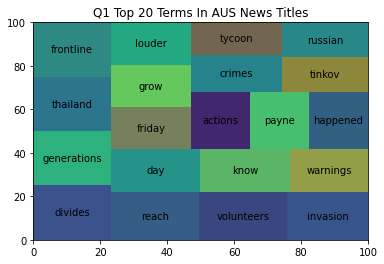

In [ ]:
label = vocabau["Terms"]
sizes = vocabau["Weight"]
squarify.plot(sizes)

#Adding the aesthetics
plt.title('Q1 Top 20 Terms In AUS News Titles')
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
# Show the plot
plt.show()

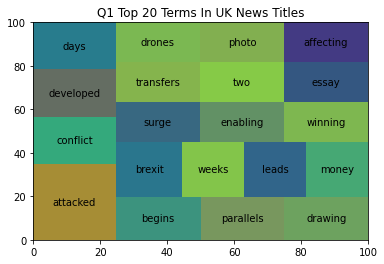

In [ ]:
label = vocabuk["Terms"]
sizes = vocabuk["Weight"]
squarify.plot(sizes)

#Adding the aesthetics
plt.title('Q1 Top 20 Terms In UK News Titles')
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
# Show the plot
plt.show()

Text(0.5, 6.79999999999999, 'Q2 AUS VS UK News Titles Polarity (Textblob)')

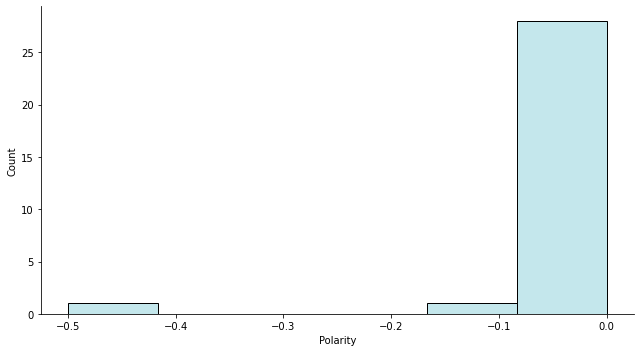

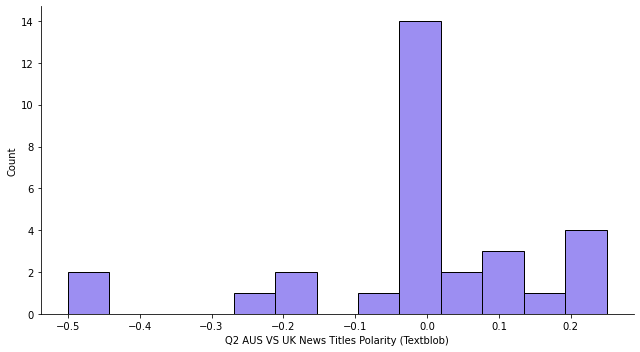

In [ ]:
#Visualise the results
#Create the bar chart
sns.displot(df_textblob_au["Polarity"], height= 5, aspect=1.8, color='#B0E0E6')
sns.displot(df_textblob_uk["Polarity"], height= 5, aspect=1.8, color='#7B68EE')

plt.xlabel("Q2 AUS VS UK News Titles Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Q2 AUS VS UK News Titles Subjectivity (Textblob)')

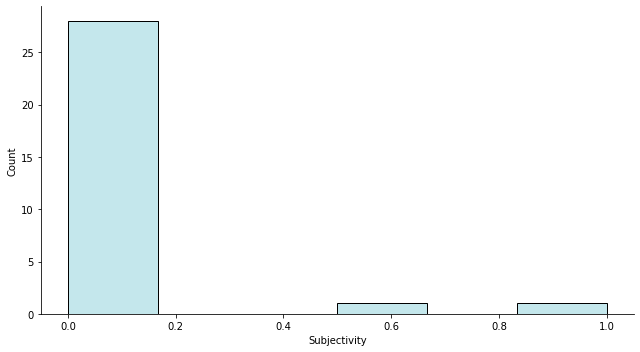

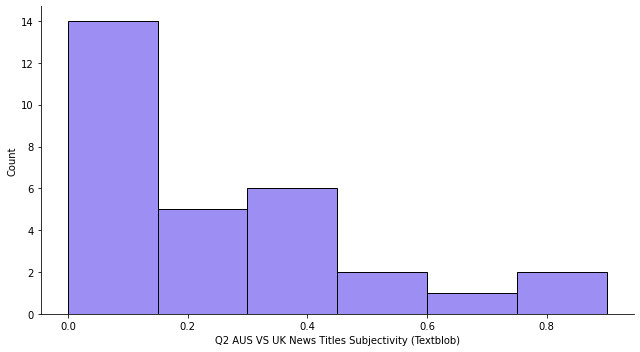

In [ ]:
#Visualise the results
#Create the bar chart
sns.displot(df_textblob_au["Subjectivity"], height= 5, aspect=1.8, color='#B0E0E6')
sns.displot(df_textblob_uk["Subjectivity"], height= 5, aspect=1.8, color='#7B68EE')

plt.xlabel("Q2 AUS VS UK News Titles Subjectivity (Textblob)")

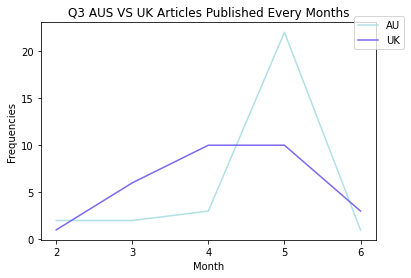

In [ ]:
#Visualise the results
df_month_au.set_index('Months', inplace=True)
df_month_uk.set_index('Months', inplace=True)


plt.plot(df_month_au, label='AU', color='#B0E0E6')
plt.plot(df_month_uk, label='UK', color='#7B68EE')
        
plt.ylabel("Frequencies")
plt.xlabel('Month')
plt.title("Q3 AUS VS UK Articles Published Every Months")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

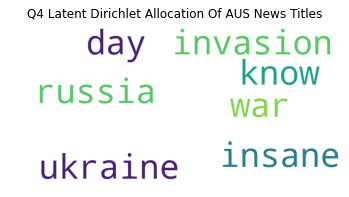

In [ ]:
#Visualise the results
wordcloud_au = WordCloud(background_color='white',
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(word_list_au))
fig = plt.figure()

print(wordcloud_au)
plt.title('Q4 Latent Dirichlet Allocation Of AUS News Titles')
plt.imshow(wordcloud_au)
plt.axis('off')
plt.show()

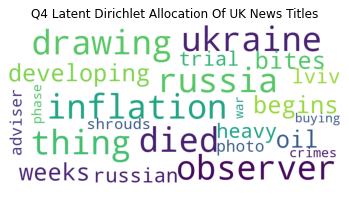

In [ ]:
#Visualise the results
wordcloud_uk = WordCloud(background_color='white',
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(word_list_uk))
fig = plt.figure()

print(wordcloud_uk)
plt.title('Q4 Latent Dirichlet Allocation Of UK News Titles')
plt.imshow(wordcloud_uk)
plt.axis('off')
plt.show()

In [ ]:
#Q5
# Visualize the topics
pyLDAvis.enable_notebook()
vis_au = pyLDAvis.gensim_models.prepare(aulda_model, aucorpus, auvocab, mds='mmds')
vis_au

/opt/conda/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.034603  0.225856       1        1  48.112000
10     0.013889  0.208629       2        1  15.405932
6     -0.189850 -0.005062       3        1   9.148028
1      0.189842 -0.087572       4        1   6.635660
2      0.068563  0.128294       5        1   6.132542
11    -0.018748  0.152579       6        1   4.006693
3      0.046040  0.200063       7        1   3.505601
0     -0.018042 -0.102848       8        1   0.881693
4     -0.018042 -0.102848       9        1   0.881693
5     -0.018042 -0.102848      10        1   0.881693
7     -0.018042 -0.102848      11        1   0.881693
8     -0.018042 -0.102848      12        1   0.881693
9     -0.018042 -0.102848      13        1   0.881693
12    -0.018042 -0.102848      14        1   0.881693
14    -0.018042 -0.102848      15        1   0.881693, topic_info=         Term       Freq      Total Category  logprob  loglift
40        day  20.000000  20.000000  Default  30.0000  30.0000
42       know  20.000000  20.000000  Default  29.0000  29.0000
41   invasion  20.000000  20.000000  Default  28.0000  28.0000
3     ukraine  25.000000  25.000000  Default  27.0000  27.0000
4         war  25.000000  25.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
7        oleg   0.032606   1.481488  Topic15  -3.9703   0.9148
30   happened   0.032606   1.527512  Topic15  -3.9703   0.8842
5   denounces   0.032606   1.481490  Topic15  -3.9703   0.9148
9      tinkov   0.032606   1.481490  Topic15  -3.9703   0.9148
27    actions   0.032606   1.527511  Topic15  -3.9703   0.8842

[664 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
33        3  0.654660     accuses
27        3  0.654660     actions
28        3  0.533043       calls
29        3  0.654659      crimes
34        3  0.654660     crucial
40        1  0.681706         day
40        2  0.194773         day
40        5  0.048693         day
40        6  0.048693         day
40        7  0.048693         day
35        3  0.654660     defence
5         4  0.674996   denounces
11        4  0.674997   frontline
30        3  0.654660    happened
36        3  0.654661       hosts
6         4  0.674996      insane
41        1  0.681707    invasion
41        2  0.194773    invasion
41        5  0.048693    invasion
41        6  0.048693    invasion
41        7  0.048693    invasion
42        1  0.681707        know
42        2  0.194774        know
42        5  0.048693        know
42        6  0.048693        know
42        7  0.048693        know
37        3  0.654660        nato
7         4  0.674997        oleg
31        3  0.654660       payne
38        3  0.654660       proxy
12        4  0.674997       reach
32        1  0.630573      russia
32        2  0.180164      russia
32        3  0.090082      russia
32        5  0.045041      russia
32        6  0.045041      russia
32        7  0.045041      russia
8         4  0.674997     russian
39        3  0.654659      summit
9         4  0.674996      tinkov
10        4  0.674998      tycoon
3         1  0.544326     ukraine
3         2  0.155522     ukraine
3         3  0.077761     ukraine
3         4  0.077761     ukraine
3         5  0.077761     ukraine
3         6  0.038880     ukraine
3         7  0.038880     ukraine
13        4  0.674997  volunteers
4         1  0.544326         war
4         2  0.155522         war
4         3  0.077761         war
4         4  0.077761         war
4         5  0.077761         war
4         6  0.038880         war
4         7  0.038880         war, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 11, 7, 2, 3, 12, 4, 1, 5, 6, 8, 9, 10, 13, 15])

In [ ]:
#Q5
# Visualize the topics
pyLDAvis.enable_notebook()
vis_uk = pyLDAvis.gensim_models.prepare(uklda_model, ukcorpus, ukvocab, mds='mmds')
vis_uk

/opt/conda/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.131768  0.150580       1        1  24.677630
7      0.000930  0.197282       2        1  11.547170
10    -0.214386 -0.027193       3        1  10.207718
4      0.110159  0.138763       4        1   8.953515
6      0.187573 -0.009068       5        1   8.124890
8     -0.058328  0.068898       6        1   6.479769
12     0.093691 -0.152145       7        1   6.356496
1      0.096427  0.023711       8        1   4.600056
3     -0.042596 -0.151804       9        1   4.180179
5     -0.091165 -0.083376      10        1   3.761159
2      0.010804  0.042888      11        1   3.761159
9      0.063905 -0.055702      12        1   2.927153
14    -0.036781 -0.016062      13        1   2.927153
0      0.005769 -0.063384      14        1   0.747977
11     0.005766 -0.063387      15        1   0.747977, topic_info=         Term      Freq     Total Category  logprob  loglift
53    russian  3.000000  3.000000  Default    30.00  30.0000
1      crimes  3.000000  3.000000  Default    29.00  29.0000
3         the  2.000000  2.000000  Default    28.00  28.0000
5       trial  2.000000  2.000000  Default    27.00  27.0000
20     russia  6.000000  6.000000  Default    26.00  26.0000
..        ...       ...       ...      ...      ...      ...
24      fuels  0.012885  1.359891  Topic15    -4.92   0.2364
28     brexit  0.012885  1.230819  Topic15    -4.92   0.3362
31  parallels  0.012885  1.230821  Topic15    -4.92   0.3362
39      ended  0.012885  1.173714  Topic15    -4.92   0.3837
47    causing  0.012885  1.266736  Topic15    -4.92   0.3074

[743 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
62        3  0.794989  absurdity
44        4  0.812463    accuses
126       8  0.893248    adviser
12        1  0.735347  affecting
108       2  0.789420        aid
...     ...       ...        ...
89        2  0.789422       what
15        1  0.735346    winning
72        4  0.812469      woman
107       9  0.912283      world
85        1  0.751021  zelenskiy

[170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 8, 11, 5, 7, 9, 13, 2, 4, 6, 3, 10, 15, 1, 12])

### 1.5 Insight

- **Q1: What do news headlines in Australia and the United Kingdom say about the war in Ukraine？**

**Answer&Insight**：In this part, I processed and analysed the headlines. I deconstruct news headlines from Australia and the UK, extract terms and their weight data using the TF/IDF, and visualise them using a squarify chart. This Ukrainian advertising company can find information on news title terms in the analysis and visualisation part. 

By comparing the term information in the data visualisation, we can see that the news headlines of Australia and the United Kingdom show that their views on the Ukraine war are very similar. They all revealed their dissatisfaction and condemnation of the Ukrainian war without exception. This is the only attitude the Ukrainian advertising company can identify with because of their painful experiences of this war. 

We can see from the terms data that Australia gives much attention to the Ukrainian war itself. In addition to paying attention to the war itself, the UK news also spent much space reporting the impact of the Ukrainian war on the other countries and lots of industries by comparing with their terms data.

- **Q2: How do news headlines in Australia and the United Kingdom interpret the war in Ukraine？**

**Answer&Insight**：In this part, I extracted data from Australian and British news headlines about the war in Ukraine. I used sentiment analysis with the TextBlob technique to score and visualise their polarity and subjectivity, respectively. The management of the Ukrainian advertising company can see the comparison of sentiment analysis of news headlines in Australia and the United Kingdom.

Based on this company's need to choose one country that would allow their company's business to grow steadily, its management's anticipation of the polarity analysis of the country's news headlines is positive. In addition, their subjective expectations of the content of news topics in the chosen country are neutral between public opinion and factual information due to their business, the Ukrainian advertising company.

We can see the news title comparison of polarity between Australia and the UK from the bar chart. Australia's headlines about the war in Ukraine are all negative sentiments. In contrast, Britain's headlines about the Ukrainian war were mainly positive sentiments. This is precisely what the Ukrainian advertising company wants to see, as they believe that the positive sentiment of news headlines also mirrors the positive sentiment at work in the media industry of that country.

The bar chart shows the news title comparison of subjectivity between Australia and the UK. Australia's headlines about the Ukraine war generally have low subjectivity scores. It means that they are primarily factual information rather than public opinion. The subjectivity scores of UK news headlines about the Ukrainian war are primarily low. However, most of them are in the 0.5 subjectivity range, which means that most of them contain both public opinion and factual information.

Since the company is in the advertising industry, the management of the Ukrainian advertising company believes that this combination of public opinion and factual information environment is very suitable for the future business development of their company in the advertising industry.

- **Q3: When and how often are news headlines in Australia and the United Kingdom published about the Ukraine war in 2022？**

**Answer&Insight**：In this part, I extracted the news published dates for Australia and the UK covering the Ukraine war for the entire year 2022 and counted the number of their news published in months. I compared the monthly data for the two countries in a visualization. 

The data express the unstable growth in the number of news published in Australia in 2022. They published most of the news in the dataset in May 2022 and very little at the beginning of the year. We can see that although the UK publishes less news than Australia between April and May, the growth and decrease in the number of news published throughout the year is relatively stable.

This Ukrainian advertising company believes the steady frequency of news releases reflects the maturity of the country's media industry. It can bring them a more suitable environment for their future business planning.

- **Q4: Which country should this Ukrainian advertising company starts their business in and help them succeed and why?**

**Answer&Insight**：In this part, I used the previously processed headline data plus the latent Dirichlet allocation technique to make topic predictions and terms content assignments for Australian and UK news headlines about the Ukraine war. In addition, I extracted all the lda terms data of the news headlines in these two countries and compared them in visualisation.

We can see that there is very little lda term data in Australia because of the large number of news headlines with similar content in its dataset. This makes it impossible for the model to analyse and extract other news headlines that account for a smaller proportion. Suppose we follow this logic to understand the interpretation of the Ukrainian war from the Australian media industry. It means they have been following up on the Ukrainian war itself and ignoring its impact on other regions and industries.

In contrast, the UK's lda term data contains many terms for other war-affected industries worldwide. Combining the data analysis of the previous question, we can see that the UK has a stable frequency in the number of news releases and combines more and richer content related to focus news in terms of news content. It speaks volumes about the maturity of the country's media industry. It means that the management of this Ukrainian advertising company has a better chance of success if they choose the UK to start a new business because more potential opportunities exist and an appropriate business development environment.

- **Q5: What kind of different potential commercial setbacks could the Ukrainian advertising company encounter in Australia and the UK?**

**Answer&Insight**：In this part, I used the previously processed headline data plus the latent Dirichlet allocation technique to make topic predictions and terms content assignments for Australian and UK news headlines about the Ukraine war. It combines pyLDAvis to visualise the predicted topic and term content data of the two countries.

We can see the news media industry environment and state in Australia and the UK from the data analysis and topic modelling visualisation above, as well as the concerns of the management of the Ukrainian advertising company about the potential risks they may encounter in these two countries.

If we suppose the management of this Ukrainian advertising company decides to come to Australia to develop their new business. We can interpret the potential risks they will encounter in starting a new business in Australia from the above data analysis and topic modelling visualisation. It includes but is not limited to the limited development scale of the company due to the immaturity of the country's media industry; the lack of public opinion feedback in the advertising media industry caused by the fact that the citizens are more accustomed to factual information; and the limited potential development opportunities in the advertising media industry due to the neglect reports of other areas related to focus news.

If we suppose the management of this Ukrainian advertising company decides to come to the UK to develop their new business. We can interpret the potential risks they will encounter in starting a new business in the UK from the above data analysis and topic modelling visualisation. It includes but is not limited to the too much competition between old and new companies in this industry due to the over-maturity of the country's media industry.

The Ukrainian advertising company finally decided to choose the United Kingdom as their new business start country based on the above analysis.